# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

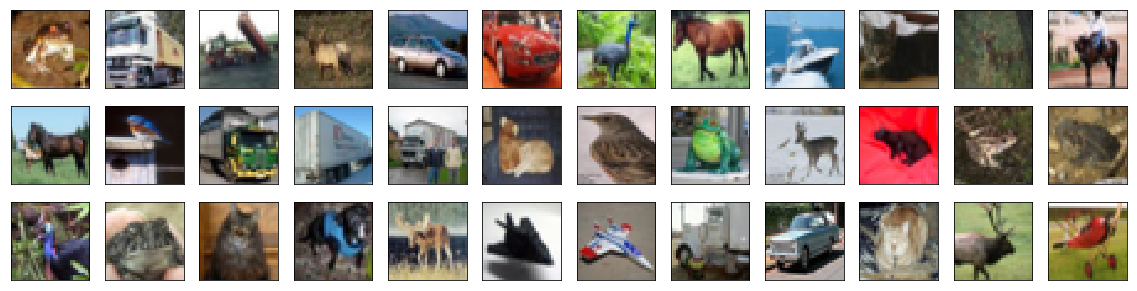

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
x_train = x_train.astype("float32") / 255
x_test  = x_test.astype("float32") / 255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
from keras.utils import np_utils

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print("x_train shape: %s" % str(x_train.shape))
print("y_train shape: %s" % str(y_train.shape))
print("x_test  shape: %s" % str( x_test.shape))
print("y_test  shape: %s" % str( y_test.shape))
print("x_valid shape: %s" % str(x_valid.shape))
print("y_valid shape: %s" % str(y_valid.shape))

x_train shape: (45000, 32, 32, 3)
y_train shape: (45000, 10)
x_test  shape: (10000, 32, 32, 3)
y_test  shape: (10000, 10)
x_valid shape: (5000, 32, 32, 3)
y_valid shape: (5000, 10)


### 5. Define the Model Architecture 

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(.3))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dropout(.4))
model.add(Dense(10, activation="softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
__________

### 6. Compile the Model 

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [7]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### 7. Train the Model 

In [8]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath="model_origin.weights.best.hdf5", verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train,
                batch_size=32, epochs=100,
                validation_data=(x_valid, y_valid),
                callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
Epoch 00000: val_loss improved from inf to 1.38830, saving model to model_origin.weights.best.hdf5
26s - loss: 1.6035 - acc: 0.4239 - val_loss: 1.3883 - val_acc: 0.5006
Epoch 2/100
Epoch 00001: val_loss did not improve
25s - loss: 1.2737 - acc: 0.5452 - val_loss: 1.5303 - val_acc: 0.5050
Epoch 3/100
Epoch 00002: val_loss improved from 1.38830 to 1.15697, saving model to model_origin.weights.best.hdf5
26s - loss: 1.1623 - acc: 0.5899 - val_loss: 1.1570 - val_acc: 0.5942
Epoch 4/100
Epoch 00003: val_loss did not improve
25s - loss: 1.0881 - acc: 0.6179 - val_loss: 1.3320 - val_acc: 0.5760
Epoch 5/100
Epoch 00004: val_loss improved from 1.15697 to 1.05777, saving model to model_origin.weights.best.hdf5
25s - loss: 1.0389 - acc: 0.6394 - val_loss: 1.0578 - val_acc: 0.6358
Epoch 6/100
Epoch 00005: val_loss did not improve
26s - loss: 1.0091 - acc: 0.6513 - val_loss: 1.1306 - val_acc: 0.6144
Epoch 7/100
Epoch 00006: val_loss improv

Epoch 00065: val_loss did not improve
23s - loss: 1.7180 - acc: 0.4084 - val_loss: 4.1978 - val_acc: 0.2890
Epoch 67/100
Epoch 00066: val_loss did not improve
24s - loss: 1.7176 - acc: 0.4096 - val_loss: 1.4532 - val_acc: 0.4890
Epoch 68/100
Epoch 00067: val_loss did not improve
27s - loss: 1.7305 - acc: 0.4023 - val_loss: 1.6518 - val_acc: 0.4618
Epoch 69/100
Epoch 00068: val_loss did not improve
26s - loss: 1.7407 - acc: 0.4025 - val_loss: 1.5775 - val_acc: 0.4142
Epoch 70/100
Epoch 00069: val_loss did not improve
25s - loss: 1.7444 - acc: 0.3968 - val_loss: 1.5877 - val_acc: 0.4424
Epoch 71/100
Epoch 00070: val_loss did not improve
23s - loss: 1.7607 - acc: 0.3942 - val_loss: 1.6993 - val_acc: 0.3974
Epoch 72/100
Epoch 00071: val_loss did not improve
24s - loss: 1.7614 - acc: 0.3914 - val_loss: 1.6886 - val_acc: 0.4110
Epoch 73/100
Epoch 00072: val_loss did not improve
23s - loss: 1.7901 - acc: 0.3865 - val_loss: 1.8488 - val_acc: 0.4154
Epoch 74/100
Epoch 00073: val_loss did not im

### 8. Load the Model with the Best Validation Accuracy

In [11]:
model.load_weights("model_origin.weights.best.hdf5")

### 9. Calculate Classification Accuracy on Test Set

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.684


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [13]:
y_hat = model.predict(x_test)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

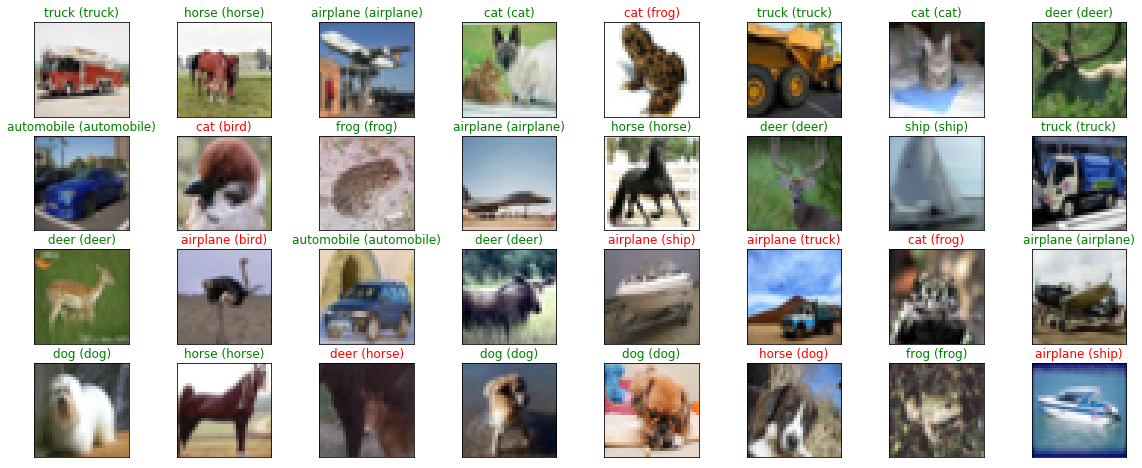

In [14]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))

for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx],
                                  cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))